In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
uploaded = files.upload()

Saving vehicles.csv to vehicles.csv


In [ ]:

import io
data = pd.read_csv(io.BytesIO(uploaded['vehicles.csv']))
print(data)


              id  ...       long
0     7307730503  ... -85.326357
1     7307218858  ... -85.480000
2     7307164168  ... -85.480000
3     7307164193  ... -85.480000
4     7307142186  ... -85.480000
...          ...  ...        ...
4006  7293159321  ... -85.243200
4007  7293158823  ... -85.243200
4008  7293151142  ...        NaN
4009  7293134588  ... -86.980000
4010  7293109125  ... -86.817617

[4011 rows x 25 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4011 non-null   int64  
 1   url           4011 non-null   object 
 2   region        4011 non-null   object 
 3   region_url    4011 non-null   object 
 4   price         4011 non-null   int64  
 5   year          3973 non-null   float64
 6   manufacturer  3774 non-null   object 
 7   model         3977 non-null   object 
 8   condition     2339 non-null   object 
 9   cylinders     2289 non-null   object 
 10  fuel          3924 non-null   object 
 11  odometer      4003 non-null   float64
 12  title_status  3863 non-null   object 
 13  transmission  4009 non-null   object 
 14  VIN           2714 non-null   object 
 15  drive         2656 non-null   object 
 16  size          827 non-null    object 
 17  type          2982 non-null   object 
 18  paint_color   3034 non-null 

In [ ]:
data.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year              38
manufacturer     237
model             34
condition       1672
cylinders       1722
fuel              87
odometer           8
title_status     148
transmission       2
VIN             1297
drive           1355
size            3184
type            1029
paint_color      977
image_url          0
description        0
county          4011
state              0
lat               44
long              44
dtype: int64

In [ ]:
null_columns = data.columns[data.isna().mean() > 0.33]
data = data.drop(null_columns, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4011 non-null   int64  
 1   url           4011 non-null   object 
 2   region        4011 non-null   object 
 3   region_url    4011 non-null   object 
 4   price         4011 non-null   int64  
 5   year          3973 non-null   float64
 6   manufacturer  3774 non-null   object 
 7   model         3977 non-null   object 
 8   fuel          3924 non-null   object 
 9   odometer      4003 non-null   float64
 10  title_status  3863 non-null   object 
 11  transmission  4009 non-null   object 
 12  VIN           2714 non-null   object 
 13  type          2982 non-null   object 
 14  paint_color   3034 non-null   object 
 15  image_url     4011 non-null   object 
 16  description   4011 non-null   object 
 17  state         4011 non-null   object 
 18  lat           3967 non-null 

In [ ]:
unneded_cols=['id', 'url', 'region_url', 'image_url', 'description']
data = data.drop(unneded_cols, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4011 non-null   object 
 1   price         4011 non-null   int64  
 2   year          3973 non-null   float64
 3   manufacturer  3774 non-null   object 
 4   model         3977 non-null   object 
 5   fuel          3924 non-null   object 
 6   odometer      4003 non-null   float64
 7   title_status  3863 non-null   object 
 8   transmission  4009 non-null   object 
 9   VIN           2714 non-null   object 
 10  type          2982 non-null   object 
 11  paint_color   3034 non-null   object 
 12  state         4011 non-null   object 
 13  lat           3967 non-null   float64
 14  long          3967 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 470.2+ KB


In [ ]:
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'VIN': 1786,
 'fuel': 6,
 'manufacturer': 38,
 'model': 1227,
 'paint_color': 13,
 'region': 6,
 'state': 1,
 'title_status': 7,
 'transmission': 4,
 'type': 14}

In [ ]:
data=data.drop('model',axis=1)
data=data.drop('manufacturer',axis=1)
data=data.drop('VIN',axis=1)
data=data.drop('paint_color',axis=1)
data=data.drop('type',axis=1)

In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data.info()

In [ ]:
data = onehot_encode(
    data,
    ['region', 'fuel', 'title_status', 'transmission', 'state'],
    ['reg', 'fuel', 'title', 'trans', 'state']
)

In [ ]:
data

,price,year,odometer,lat,long,reg_auburn,reg_birmingham,reg_dothan,reg_florence / muscle shoals,reg_gadsden-anniston,reg_huntsville / decatur,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_clean,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage,trans_automatic,trans_manual,trans_other,state_al
0,9500,2003.0,30376.0,32.614209,-85.326357,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,28990,2018.0,20736.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,16590,2013.0,61087.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,28990,2017.0,18041.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
4,20590,2017.0,36436.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,36995,2012.0,41364.0,34.950600,-85.243200,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4007,16995,2018.0,82003.0,34.950600,-85.243200,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4008,21500,2019.0,109000.0,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4009,11590,2016.0,49264.0,34.570000,-86.980000,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1


In [ ]:
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())

In [ ]:
data.isna().sum().sum()

0

In [ ]:
y = data.loc[:, 'price']
x = data.drop('price', axis=1)

In [ ]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=34)


In [ ]:
lin_model = LinearRegression()

lin_model.fit(x_train, y_train)

lin_y_preds = lin_model.predict(x_test)

In [ ]:
lgb_model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    n_estimators=100,
    reg_lambda=1.0
)

lgb_model.fit(x_train, y_train)

lgb_y_preds = lgb_model.predict(x_test)

In [ ]:
lin_loss = np.sqrt(mean_squared_error(y_test, lin_y_preds))
lgb_loss = np.sqrt(mean_squared_error(y_test, lgb_y_preds))

In [ ]:
print("Linear Regression RMSE:", lin_loss)
print("Gradient Boosted RMSE:", lgb_loss)

Linear Regression RMSE: 2.2653374997540964e+16
Gradient Boosted RMSE: 7882.354544591338


In [ ]:
print("Linear Regression R^2 Score:", lin_model.score(x_test, y_test))
print("Gradient Boosted R^2 Score:", lgb_model.score(x_test, y_test))

Linear Regression R^2 Score: -2.6756532491731967e+24
Gradient Boosted R^2 Score: 0.6760515303815449


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data

,price,year,odometer,lat,long,reg_auburn,reg_birmingham,reg_dothan,reg_florence / muscle shoals,reg_gadsden-anniston,reg_huntsville / decatur,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_clean,title_lien,title_missing,title_parts only,title_rebuilt,title_salvage,trans_automatic,trans_manual,trans_other,state_al
0,9500,2003.0,30376.0,32.614209,-85.326357,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,28990,2018.0,20736.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,16590,2013.0,61087.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,28990,2017.0,18041.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
4,20590,2017.0,36436.0,32.590000,-85.480000,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,36995,2012.0,41364.0,34.950600,-85.243200,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4007,16995,2018.0,82003.0,34.950600,-85.243200,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4008,21500,2019.0,109000.0,34.014725,-86.075396,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4009,11590,2016.0,49264.0,34.570000,-86.980000,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1


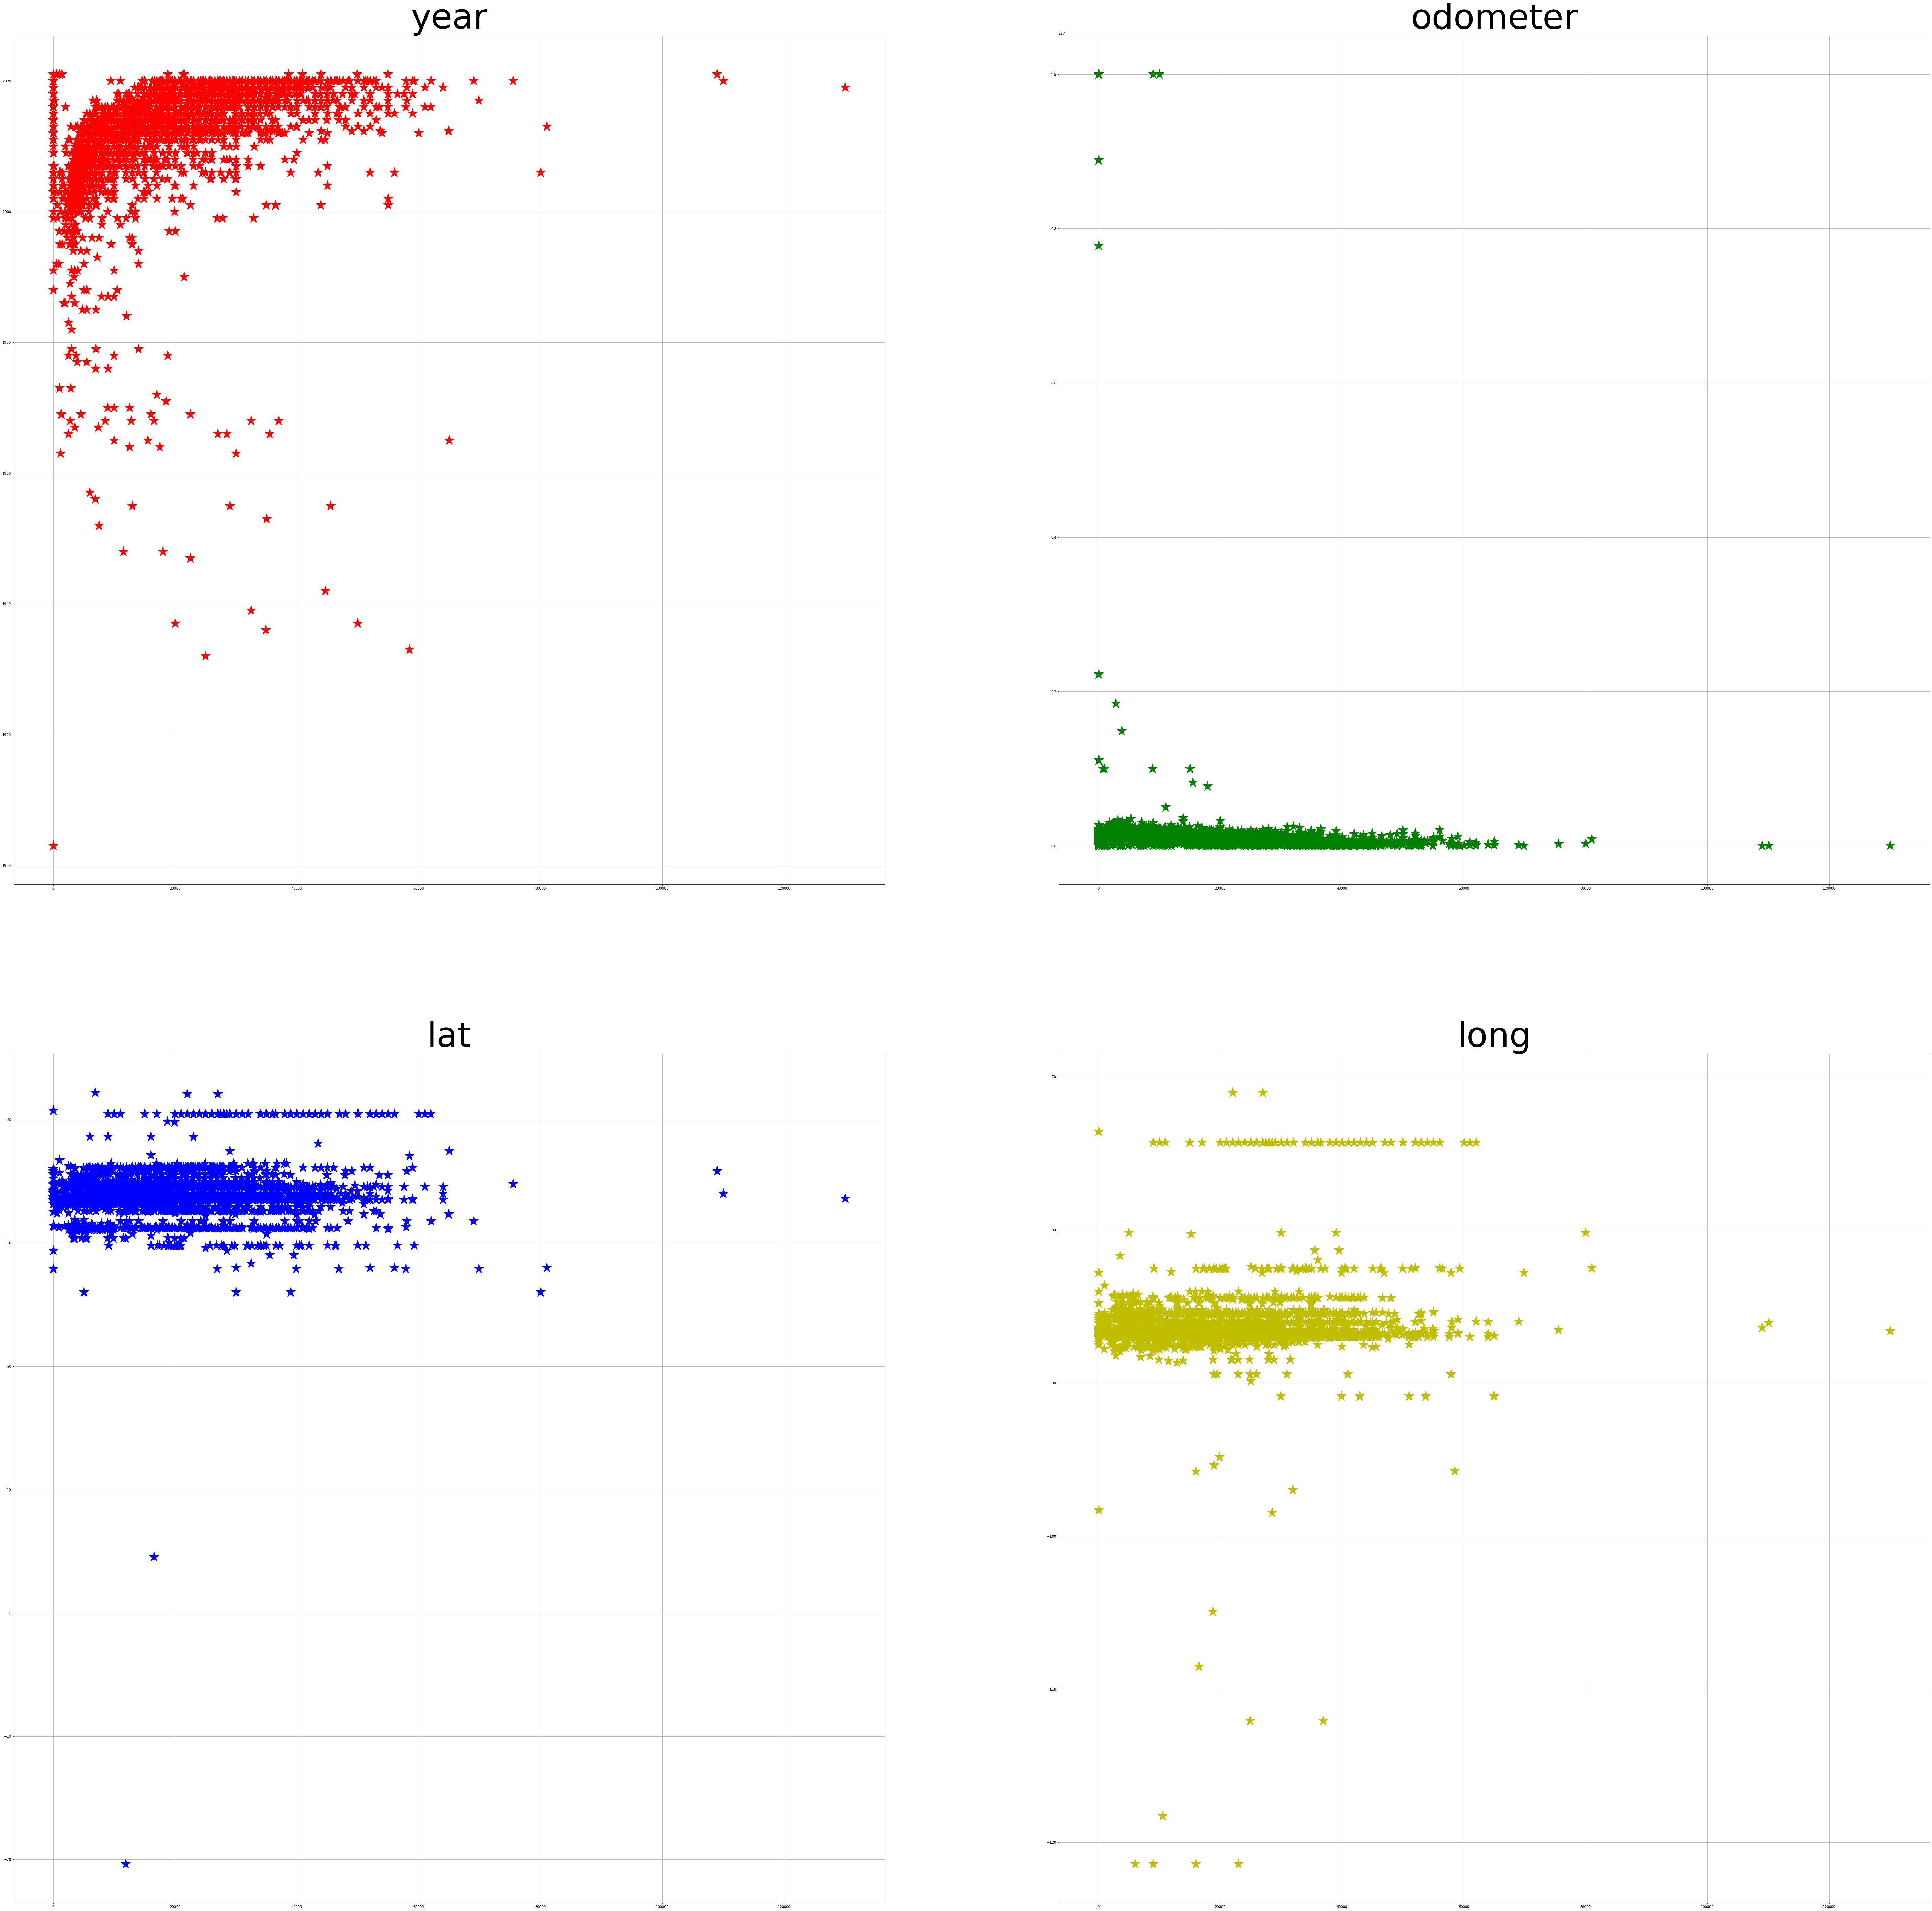

In [ ]:
X_set,y_set=data[['year','odometer','lat','long']],data[['price']]
plt.figure(figsize=(100,100))
plt.subplot(221)
plt.plot(y_set,X_set['year'],'r*',markersize=30)
plt.title('year',fontsize=100)
plt.grid()


plt.subplot(222)
plt.plot(y_set,X_set['odometer'],'g*',markersize=30)
plt.title('odometer',fontsize=100)
plt.grid()


plt.subplot(223)
plt.plot(y_set,X_set['lat'],'b*',markersize=30)
plt.title('lat',fontsize=100)
plt.grid()


plt.subplot(224)
plt.plot(y_set,X_set['long'],'y*',markersize=30)
plt.title('long',fontsize=100)
plt.grid()


In [ ]:
data.shape

(4011, 26)